In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [4]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [5]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [6]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [7]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def plot_rows(df, columns, filename):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::300])
        # rotate label
        plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=15)
        ax[i].set_title(column)
    # more spacing each axe
    fig.subplots_adjust(hspace=1)
    
    # store to csv
    plt.savefig(filename)
    plt.show()

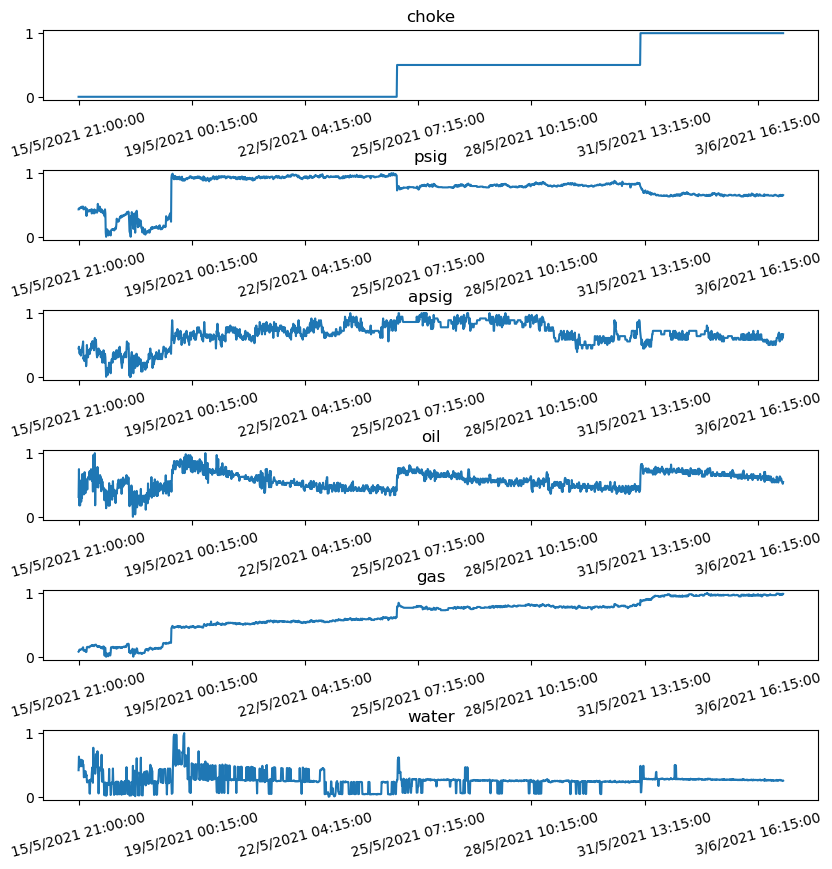

In [9]:
plot_rows(df_normalized, columns2, 'plot_rows_normalized')

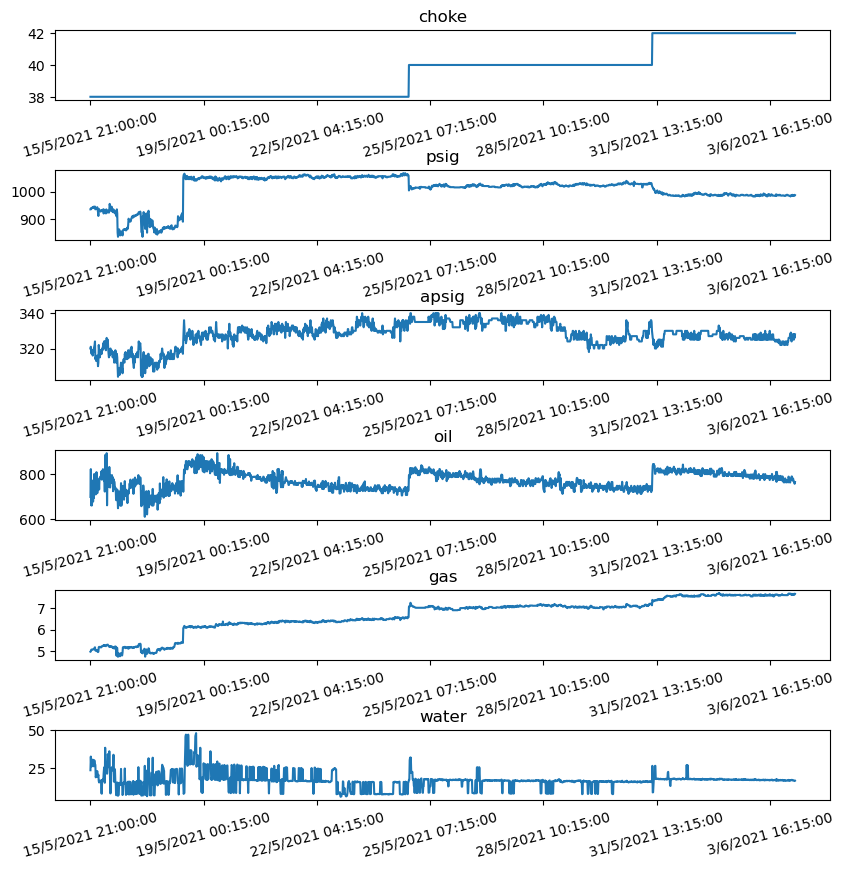

In [10]:
plot_rows(df_raw, columns2, 'plot_rows')

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)


In [11]:
# get choke 38 only
df_choke_38 = df_raw[df_raw['choke'] == 38].copy()
df_choke_38.head()

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208


In [12]:
scaler = MinMaxScaler()

In [13]:
df_choke_38_normalized = scaler.fit_transform(df_choke_38)
df_choke_38_normalized = pd.DataFrame(df_choke_38_normalized, columns=columns2)
df_choke_38_normalized['datetime'] = df_choke_38.index
df_choke_38_normalized = df_choke_38_normalized.set_index('datetime')
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [14]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
# sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)
# tanh
def tanh(x):
    return math.tanh(x)
# tanh derivative
def tanh_derivative(x):
    return 1.0 - x**2

In [15]:
# create simple LSTM cell no function and class
def simple_lstm_cell(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    """
    Implements a simple LSTM cell.

    Args:
        inputs (ndarray): Input array of shape (batch_size, input_size).
        h (ndarray): Hidden state array of shape (batch_size, hidden_size).
        c (ndarray): Cell state array of shape (batch_size, hidden_size).
        Wf (ndarray): Weight matrix for the forget gate of shape (input_size, hidden_size).
        Wi (ndarray): Weight matrix for the input gate of shape (input_size, hidden_size).
        Wc (ndarray): Weight matrix for the cell state of shape (input_size, hidden_size).
        Wo (ndarray): Weight matrix for the output gate of shape (input_size, hidden_size).
        bf (ndarray): Bias vector for the forget gate of shape (hidden_size,).
        bi (ndarray): Bias vector for the input gate of shape (hidden_size,).
        bc (ndarray): Bias vector for the cell state of shape (hidden_size,).
        bo (ndarray): Bias vector for the output gate of shape (hidden_size,).

    Returns:
        tuple: A tuple containing the updated hidden state (h) and cell state (c) arrays.
    """
    f = sigmoid(np.dot(inputs, Wf) + np.dot(h, bf))
    i = sigmoid(np.dot(inputs, Wi) + np.dot(h, bi))
    c_tilda = tanh(np.dot(inputs, Wc) + np.dot(h, bc))
    c = f * c + i * c_tilda
    o = sigmoid(np.dot(inputs, Wo) + np.dot(h, bo))
    h = o * tanh(c)
    return h, c

In [16]:
Wf = np.random.rand(6, 1)
Wi = np.random.rand(6, 1)
Wc = np.random.rand(6, 1)
Wo = np.random.rand(6, 1)
bf = np.random.rand(1)
bi = np.random.rand(1)
bc = np.random.rand(1)
bo = np.random.rand(1)

# print
# print('Wf:', Wf)
# print('Wi:', Wi)
# print('Wc:', Wc)
# print('Wo:', Wo)
# print('bf:', bf)
# print('bi:', bi)
# print('bc:', bc)
# print('bo:', bo)

# save weights as DataFrame
df_weights = pd.DataFrame({'Wf': Wf.flatten(), 'Wi': Wi.flatten(), 'Wc': Wc.flatten(), 'Wo': Wo.flatten()})
df_biases = pd.DataFrame({'bf': bf, 'bi': bi, 'bc': bc, 'bo': bo})

# save to .csv
df_weights.to_csv('weights.csv', index=False)
df_biases.to_csv('biases.csv', index=False)

display(df_weights)
display(df_biases)

,Wf,Wi,Wc,Wo
0,0.878161,0.380242,0.895872,0.371017
1,0.553141,0.215390,0.093423,0.173164
2,0.745326,0.398046,0.419508,0.053561
3,0.288807,0.669304,0.024859,0.377637
4,0.439394,0.079125,0.245331,0.487451
5,0.480942,0.133927,0.858696,0.320622


,bf,bi,bc,bo
0,0.435482,0.888692,0.062005,0.815775


In [17]:
cell = pd.DataFrame([], columns=['hidden state', 'cell state'])
# use function above
cell0 = simple_lstm_cell(
    df_choke_38_normalized.iloc[0].values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)

# create function to simplify code above line 19 and 22
def cell_append(self, new_cell):
    new_cell = pd.DataFrame([new_cell], columns=['hidden state', 'cell state'])
    return pd.concat([self, new_cell], ignore_index=True)
# append the first cell to the cell DataFrame
cell = cell_append(cell, cell0)

# print the updated cell DataFrame
cell

/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_6305/214509461.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([self, new_cell], ignore_index=True)


,hidden state,cell state
0,0.202768,0.350701


In [18]:
df_choke_38_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.128135,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.132497,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.177208,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.172301,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.181570,0.479358
...,...,...,...,...,...,...
24/5/2021 16:00:00,0.0,0.978448,0.833333,0.341397,0.982007,0.220183
24/5/2021 16:15:00,0.0,0.987069,0.722222,0.432816,0.966739,0.041284
24/5/2021 16:30:00,0.0,0.965517,0.777778,0.464392,0.978190,0.043578


In [19]:
df_choke_38_normalized.iloc[0]

choke    0.000000
psig     0.431034
apsig    0.444444
oil      0.311858
gas      0.128135
water    0.417431
Name: 15/5/2021 21:00:00, dtype: float64

In [20]:
# cell 1
cell1 = simple_lstm_cell(
    df_choke_38_normalized.iloc[1].values,
    cell[['hidden state']].iloc[0].values[0],
    cell[['cell state']].iloc[0].values[0],
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# cell1
# # append the second cell to the cell DataFrame
cell = cell_append(cell, cell1)
cell

/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


,hidden state,cell state
0,0.202768,0.350701
1,0.454017,0.783854


In [21]:
# what the result of that LSTM cell

#  create loop 
for i in range(2, len(df_choke_38_normalized)):
    new_cell = simple_lstm_cell(
        df_choke_38_normalized.iloc[i].values,
        cell[['hidden state']].iloc[-1].values[0],
        cell[['cell state']].iloc[-1].values[0],
        Wf,
        Wi,
        Wc,
        Wo,
        bf,
        bi,
        bc,
        bo
    )
    cell = cell_append(cell, new_cell)
    

/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)
/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in f

In [22]:
# create neural network from that LSTM cell
def simple_lstm(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states

/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


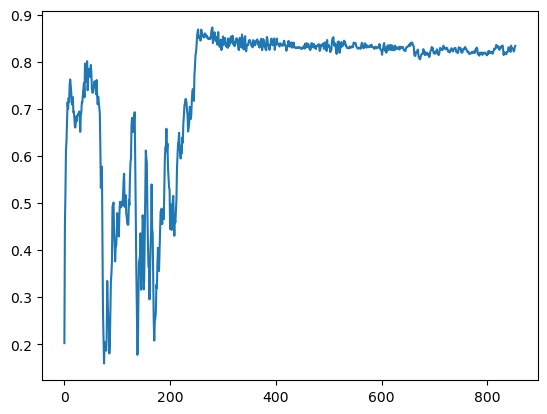

In [23]:
# use that function
hidden_states = simple_lstm(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
# plot the hidden states
plt.plot(hidden_states)

In [24]:
# unroll prediction
def simple_lstm_unroll(inputs, h, c, Wf, Wi, Wc, Wo, bf, bi, bc, bo):
    hidden_states = []
    for i in range(len(inputs)):
        h, c = simple_lstm_cell(
            inputs[i],
            h,
            c,
            Wf,
            Wi,
            Wc,
            Wo,
            bf,
            bi,
            bc,
            bo
        )
        hidden_states.append(h)
    return hidden_states, h, c

In [25]:
lstm_unroll = simple_lstm_unroll(
    df_choke_38_normalized.values,
    0,
    0,
    Wf,
    Wi,
    Wc,
    Wo,
    bf,
    bi,
    bc,
    bo
)
print(lstm_unroll)

([0.20276797150368522, 0.45401703020518464, 0.5242372829908077, 0.613345963752834, 0.6332158621227448, 0.6752094918963195, 0.7144591902726246, 0.7000741632711145, 0.7235146719416279, 0.7157042402654825, 0.753572924105668, 0.7627638528378392, 0.7500945211339438, 0.7343717388995605, 0.7119183586219506, 0.7092227111656971, 0.7251698257605992, 0.6926007260144962, 0.6948011334669478, 0.6759783090369269, 0.6609211594175215, 0.6614995543260379, 0.68378093450673, 0.6740794464208298, 0.6857321830102838, 0.6863937797708716, 0.6888398059226444, 0.6920900318111352, 0.6948961378522269, 0.6795795300911773, 0.6515205501257315, 0.6859318418820779, 0.6931606289288811, 0.7140833105189913, 0.7139376452462303, 0.7315431014569443, 0.743356773107538, 0.7556100301032828, 0.7248463036085517, 0.7967304569505602, 0.7730835480831271, 0.7581569818141369, 0.775556389493439, 0.8016818434936767, 0.7398905017432702, 0.7673390112907282, 0.7857135123775815, 0.7730200217924045, 0.7734766592285416, 0.7680454202053568, 0.

/tmp/ipykernel_6305/2598202548.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))
/tmp/ipykernel_6305/2598202548.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.tanh(x)


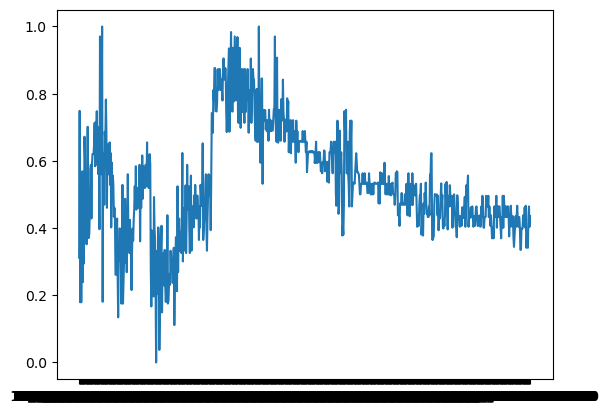

In [26]:
# plot
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

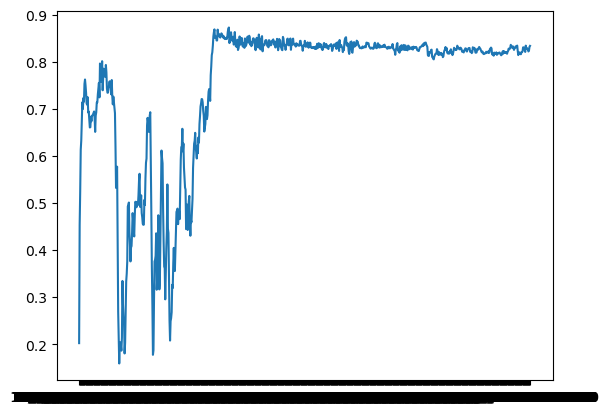

In [27]:
# plot
plt.plot(df_choke_38_normalized.index, lstm_unroll[0], label='Predicted')

In [38]:
lstm_unroll[-1]

5.482059328903893

In [37]:
# denormalize lstm_unroll without library
def denormalize(df, normalized_value):
    df_max = df.max()
    df_min = df.min()
    return normalized_value * (df_max - df_min) + df_min

# denormalize
denormalized_lstm_unroll = denormalize(df_raw, lstm_unroll[:-1])
denormalized_lstm_unroll

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lstm_forward(x, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c):
    f_t = sigmoid(np.dot(x, W_f) + np.dot(h_prev, U_f) + b_f)
    i_t = sigmoid(np.dot(x, W_i) + np.dot(h_prev, U_i) + b_i)
    o_t = sigmoid(np.dot(x, W_o) + np.dot(h_prev, U_o) + b_o)
    c_tilde_t = np.tanh(np.dot(x, W_c) + np.dot(h_prev, U_c) + b_c)
    c_t = f_t * c_prev + i_t * c_tilde_t
    h_t = o_t * np.tanh(c_t)
    return h_t, c_t

def predict(h, c, W_out, b_out):
    return np.dot(h, W_out) + b_out

# Initialize learnable parameters
W_f = np.random.rand(6, 6)
U_f = np.random.rand(6, 6)
b_f = np.random.rand(6)
W_i = np.random.rand(6, 6)
U_i = np.random.rand(6, 6)
b_i = np.random.rand(6)
W_o = np.random.rand(6, 6)
U_o = np.random.rand(6, 6)
b_o = np.random.rand(6)
W_c = np.random.rand(6, 6)
U_c = np.random.rand(6, 6)
b_c = np.random.rand(6)
W_out = np.random.rand(6, 6)
b_out = np.random.rand(6)

# print
print('W_f:', W_f)
print('U_f:', U_f)
print('b_f:', b_f)
print('W_i:', W_i)
print('U_i:', U_i)
print('b_i:', b_i)
print('W_o:', W_o)
print('U_o:', U_o)
print('b_o:', b_o)
print('W_c:', W_c)
print('U_c:', U_c)
print('b_c:', b_c)
print('W_out:', W_out)
print('b_out:', b_out)

# save parameter as txt
text = f"W_f: {W_f}"
text += f"\nU_f: {U_f}"
text += f"\nb_f: {b_f}"
text += f"\nW_i: {W_i}"
text += f"\nU_i: {U_i}"
text += f"\nb_i: {b_i}"
text += f"\nW_o: {W_o}"
text += f"\nU_o: {U_o}"
text += f"\nb_o: {b_o}"
text += f"\nW_c: {W_c}"
text += f"\nU_c: {U_c}"
text += f"\nb_c: {b_c}"
text += f"\nW_out: {W_out}"
text += f"\nb_out: {b_out}"
with open('parameter.txt', 'w') as f:
    f.write(text)

# Initialize hidden state and cell state
h_prev = np.zeros((6,))
c_prev = np.zeros((6,))

predicted_scratch = np.array([])
# Perform forward pass and prediction
# for t in range(len(df_choke_38_normalized.values)):
for t in range(400):
    x_t = df_choke_38_normalized.values[t]
    h_t, c_t = lstm_forward(x_t, h_prev, c_prev, W_f, U_f, b_f, W_i, U_i, b_i, W_o, U_o, b_o, W_c, U_c, b_c)
    h_prev = h_t
    c_prev = c_t
    predicted_values = predict(h_t, c_t, W_out, b_out)
    # append array without flatten
    predicted_scratch = np.append(predicted_scratch, predicted_values)
    print(predicted_values)

W_f: [[0.50922507 0.33444965 0.03766213 0.41315773 0.8550729  0.211411  ]
 [0.71709379 0.35037958 0.13139523 0.29387399 0.10743822 0.51825518]
 [0.37405647 0.02949868 0.05293129 0.59536006 0.3218879  0.09167787]
 [0.13356757 0.02836391 0.09912205 0.89281686 0.34890971 0.47710012]
 [0.15866373 0.23034279 0.68435547 0.00199081 0.32440901 0.445717  ]
 [0.16913401 0.26504652 0.55871428 0.08013086 0.26843836 0.89777585]]
U_f: [[0.73670902 0.43462785 0.57662123 0.55163494 0.22033341 0.03539465]
 [0.54727484 0.47898096 0.37082647 0.38690294 0.13670493 0.56231858]
 [0.64775527 0.88833178 0.96996718 0.35019425 0.72438318 0.95510157]
 [0.33995595 0.29804643 0.84244934 0.22977572 0.15320469 0.77590275]
 [0.40810997 0.42147983 0.92856754 0.56296463 0.50720299 0.48288547]
 [0.62885689 0.50159819 0.74816902 0.81785749 0.534872   0.21142677]]
b_f: [0.82276202 0.28036228 0.06810327 0.67806208 0.01944294 0.04145026]
W_i: [[0.80127134 0.15440852 0.36211116 0.48721022 0.43357547 0.04621914]
 [0.74091009 

In [30]:
predicted_scratch_reshaped = np.reshape(predicted_scratch, (-1,6))
predicted_scratch_reshaped

array([[1.00665188, 1.51691928, 0.97967216, 1.89152896, 1.95375874,
        1.36111649],
       [1.62096276, 2.52915861, 1.61930108, 2.74908345, 3.02156163,
        2.18585877],
       [1.7458562 , 2.75251694, 1.75254053, 2.92821835, 3.25417407,
        2.35399792],
       ...,
       [1.78148699, 2.83047665, 1.79514734, 2.98552865, 3.33298738,
        2.41021903],
       [1.77786451, 2.8212881 , 1.78926215, 2.97915799, 3.32469843,
        2.40420637],
       [1.78015781, 2.82706525, 1.79296553, 2.98319075, 3.32995938,
        2.40801201]])

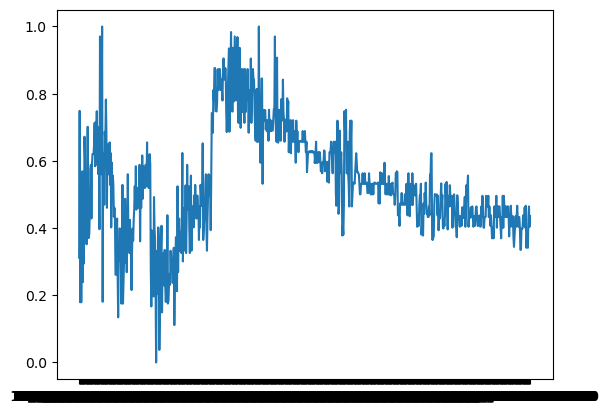

In [31]:
# plot predicted_scratch
plt.plot(df_choke_38_normalized.index, df_choke_38_normalized['oil'], label='Actual')

# FIRST STEP
mungkin ini yang terjadi kalau ambil hidden cellnya

/tmp/ipykernel_6305/2710147636.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


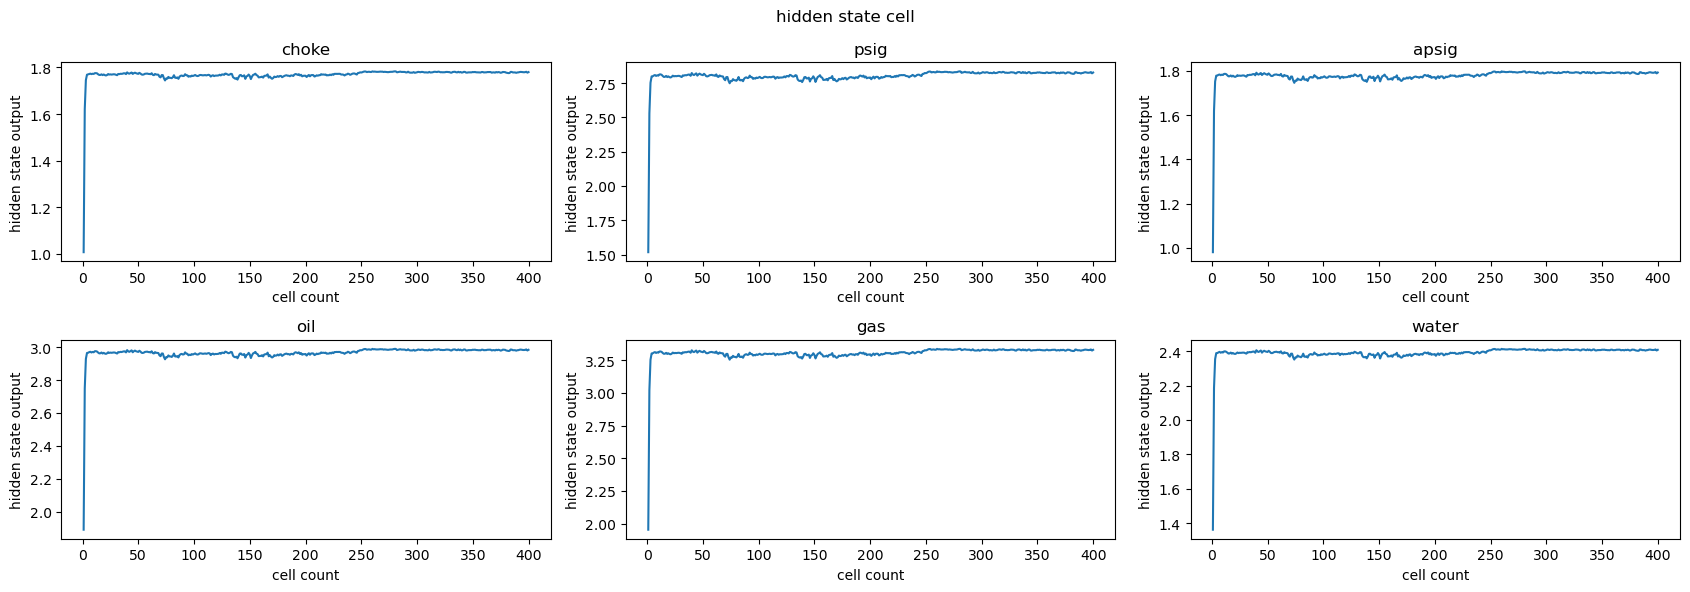

In [32]:
# plot predicted_scratch_reshaped
# plt.plot(range(predicted_scratch_reshaped.shape[0]), predicted_scratch_reshaped, label='Predicted')
fig, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=3)
for i in range(6):
    # ax[i//3, i%3].plot(range(1, df_choke_38_normalized.shape[0]+1), predicted_scratch_reshaped[:,i], label='end of hidden state')
    ax[i//3, i%3].plot(range(1, 401), predicted_scratch_reshaped[:400,i], label='end of hidden state')
    ax[i//3, i%3].set_title(columns2[i])
    ax[i//3, i%3].set_xlabel('cell count')
    ax[i//3, i%3].set_ylabel('hidden state output')
    # add gap each axis

fig.suptitle('hidden state cell')
fig.tight_layout()
fig.show()

In [33]:
predicted_scratch_reshaped[-1]

array([1.78015781, 2.82706525, 1.79296553, 2.98319075, 3.32995938,
       2.40801201])

In [34]:
# denormalized
predicted_values_denormalized = scaler.inverse_transform([predicted_scratch_reshaped[-1]])
predicted_values_denormalized

array([[  39.78015781, 1490.87913865,  368.54675893, 1454.18328501,
          10.85214551,  106.93375056]])